In [5]:
# Question 1 -extracting Tesla stock data using yfinance function
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3
import yfinance as yf
import pandas as pd
Tesla=yf.Ticker("TSLA")

  Using cached yfinance-0.2.4-py2.py3-none-any.whl (51 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.3.8-py311-none-any.whl (14 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [16]:
# Question 1 -Using ticker object and function history, extract the stock information and save it in dataframe named Tesla_data. Set the parameter to max so we get the information for max amount of time peri
Tesla_data=Tesla.history(period="40y")

In [17]:
# Question 1 -reset the index , save and display first five rows of tesla_data dataframe using head fuction
Tesla_data.reset_index(inplace=True)
Tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [18]:
#Question 3-extracting Gamestop stock data using yfinance function
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3
import yfinance as yf
import pandas as pd
Gamestop=yf.Ticker("GME")
Gamestop_data=Gamestop.history(period="40y")
Gamestop_data.reset_index(inplace=True)
Gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [5]:
#Question 2 -
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_data = response.text
else:
    print("Failed to retrieve the webpage.")

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the Tesla Revenue data
tesla_revenue_data = []
for row in soup.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) == 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip().replace('$', '').replace(',', '')
        tesla_revenue_data.append([date, revenue])

# Create a DataFrame
tesla_revenue = pd.DataFrame(tesla_revenue_data, columns=["Quarter ending", "Revenue"])

# to remove comma and dollar sign from revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
# Remove rows with missing or empty Revenue values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].astype(bool)]

# Display the last 5 rows
print(tesla_revenue.tail())


   Quarter ending Revenue
61     2010-09-30      31
62     2010-06-30      28
63     2010-03-31      21
65     2009-09-30      46
66     2009-06-30      27


In [9]:
#Question 4
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_data = response.text
else:
    print("Failed to retrieve the webpage.")

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the Tesla Revenue data
gme_revenue_data = []
for row in soup.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) == 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip().replace('$', '').replace(',', '')
        gme_revenue_data.append([date, revenue])

# Create a DataFrame
gme_revenue = pd.DataFrame(gme_revenue_data, columns=["Quarter ending", "Revenue"])

# to remove comma and dollar sign from revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
# Remove rows with missing or empty Revenue values
gme_revenue = gme_revenue[gme_revenue['Revenue'].astype(bool)]

# Display the last 5 rows
print(gme_revenue.tail())


   Quarter ending Revenue
73     2006-01-31    1667
74     2005-10-31     534
75     2005-07-31     416
76     2005-04-30     475
77     2005-01-31     709


In [11]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

TypeError: unhashable type: 'numpy.ndarray'

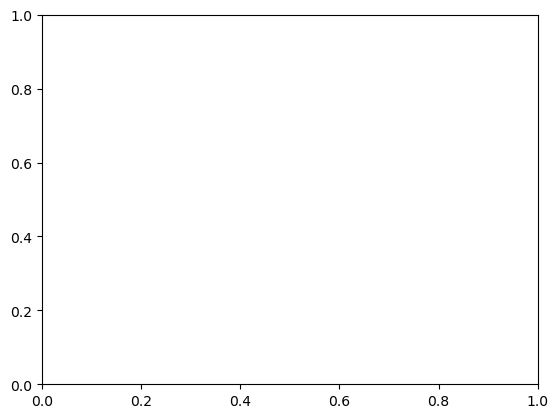

In [22]:
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3
#!pip install pandas==1.3.3
import yfinance as yf
import pandas as pd
Tesla=yf.Ticker("TSLA")
Tesla_data=Tesla.history(period="40y")
#Tesla_data.reset_index(inplace=True)
#Tesla_data.head()
#Question 2 -
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_data = response.text
else:
    print("Failed to retrieve the webpage.")

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the Tesla Revenue data
tesla_revenue_data = []
for row in soup.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) == 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip().replace('$', '').replace(',', '')
        tesla_revenue_data.append([date, revenue])

# Create a DataFrame
tesla_revenue = pd.DataFrame(tesla_revenue_data, columns=["Quarter ending", "Revenue"])

# to remove comma and dollar sign from revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
# Remove rows with missing or empty Revenue values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].astype(bool)]

make_graph(Tesla_data,tesla_revenue,'Tesla')


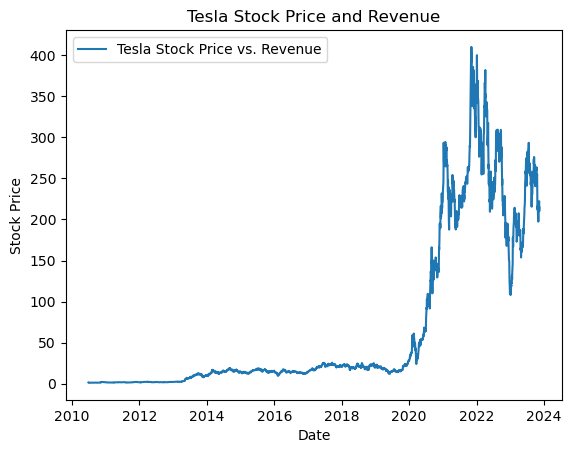

ValueError: x and y must have same first dimension, but have shapes (3367,) and (66,)

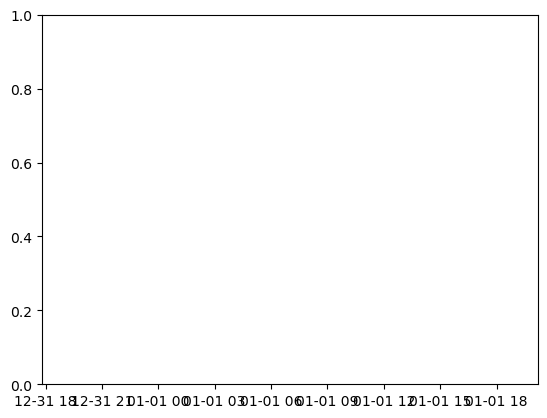

In [23]:
#Question 5
!pip install yfinance==0.2.4
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Function to create a simple line graph
def make_graph(x_values, y_values, x_label="Date", y_label="Values", title="Graph"):
    plt.plot(x_values, y_values, label="Tesla Stock Price vs. Revenue")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

# Fetching Tesla stock data using yfinance
Tesla = yf.Ticker("TSLA")
Tesla_data = Tesla.history(period="40y")

# Web scraping Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200:
    html_data = response.text
    soup = BeautifulSoup(html_data, 'html.parser')
    
    tesla_revenue_data = []
    for row in soup.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) == 2:
            date = cells[0].text.strip()
            revenue = cells[1].text.strip().replace('$', '').replace(',', '')
            tesla_revenue_data.append([date, revenue])

    tesla_revenue = pd.DataFrame(tesla_revenue_data, columns=["Quarter ending", "Revenue"])
    tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'].astype(bool)]

    # Extracting relevant columns for the graph
    tesla_dates = Tesla_data.index
    tesla_stock_prices = Tesla_data['Close']

    # Convert columns to numeric if needed
    tesla_stock_prices = pd.to_numeric(tesla_stock_prices)
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

    # Calling the make_graph function
    make_graph(tesla_dates, tesla_stock_prices, x_label="Date", y_label="Stock Price", title="Tesla Stock Price and Revenue")

    # You can also plot revenue on the same graph if the scales are compatible
    make_graph(tesla_dates, tesla_revenue['Revenue'], x_label="Date", y_label="Revenue", title="Tesla Stock Price and Revenue")
else:
    print("Failed to retrieve the webpage.")


In [28]:
#question 6
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3
import yfinance as yf
import pandas as pd
Gamestop=yf.Ticker("GME")
Gamestop_data=Gamestop.history(period="40y")
Gamestop_data.reset_index(inplace=True)

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_data = response.text
else:
    print("Failed to retrieve the webpage.")

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the Tesla Revenue data
gme_revenue_data = []
for row in soup.find_all("tr"):
    cells = row.find_all("td")
    if len(cells) == 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip().replace('$', '').replace(',', '')
        gme_revenue_data.append([date, revenue])

# Create a DataFrame
gme_revenue = pd.DataFrame(gme_revenue_data, columns=["Quarter ending", "Revenue"])

# to remove comma and dollar sign from revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
# Remove rows with missing or empty Revenue values
gme_revenue = gme_revenue[gme_revenue['Revenue'].astype(bool)]



make_graph(Gamestop_data,gme_revenue,'GME')


NameError: name 'make_subplots' is not defined